Набор данных ex1data2.txt представляет собой текстовый файл, содержащий информацию о площади дома в квадратных футах (первое число в строке), количестве комнат в доме (второе число в строке) и стоимости дома (третье число).

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Will allow us to embed images in the notebook
%matplotlib inline

**6. Загрузите набор данных ex1data2.txt из текстового файла.**

In [3]:
original_df = pandas.read_csv('ex1data2.txt', header=None, names=['area', 'rooms', 'price'])

In [4]:
original_df.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
Y = original_df['price'].values.astype('float64')
Y.shape

(47,)

**Градиентный спуск без векторизации**

In [6]:
def gd_old(X, Y, iterations = 200, alpha = 0.01):
    
    features_count = X.shape[1]
    
    theta = np.zeros(features_count)
    
    def h(theta, x):
        sum = 0
        for i in range(len(theta)):
            sum += theta[i] * x[i]
        return sum
    
    def cost_f(theta, X, Y):
        m = len(Y)
        sum = 0
        for i in range(m):
            sum += (h(theta, X[i]) - Y[i])**2

        return sum/(2*m)
    
    def der_theta(theta, X, Y, alpha, theta_idx):
        m = len(Y)
        sum = 0
        for i in range(m):
            sum += (h(theta, X[i]) - Y[i]) * X[i][theta_idx]
    
        return (alpha / m) * sum
    
    
    ## GD algorithm
    theta_history = np.zeros([iterations + 1, features_count])
    cost_history = np.zeros(iterations + 1) # .reshape(1, -1) if required
    
    cost = cost_f(theta, X, Y)

    cost_history[0] = cost
    theta_history[0] = theta
    
    for it_idx in range(iterations):
        tmptheta = np.copy(theta)
        
        for theta_idx in range(features_count):
            tmptheta[theta_idx] = theta[theta_idx] - der_theta(theta, X, Y, alpha, theta_idx)
        
        theta = np.copy(tmptheta)
        
        cost = cost_f(theta, X, Y)
        
        cost_history[it_idx + 1] = cost
        theta_history[it_idx + 1] = theta
    
    return theta, cost, theta_history, cost_history

In [9]:
de_normalized_df = original_df.drop('price', axis=1)
de_normalized_df.head()

,area,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [10]:
X_denorm = de_normalized_df.copy()
X_denorm.insert(0, '', 1)
X_denorm = X_denorm.values.astype('float64')

X_denorm[0: 2]

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00]])

**7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.**

**Mean normalization**

In [11]:
normalized_df = (de_normalized_df-de_normalized_df.mean())/(de_normalized_df.max()-de_normalized_df.min())
normalized_df.head()

,area,rooms
0,0.028494,-0.042553
1,-0.110502,-0.042553
2,0.110127,-0.042553
3,-0.161247,-0.292553
4,0.275598,0.207447


In [12]:
X_norm = normalized_df.copy()
X_norm.insert(0, '', 1)
X_norm = X_norm.values.astype('float64')

X_norm[0: 2]

array([[ 1.        ,  0.02849397, -0.04255319],
       [ 1.        , -0.11050217, -0.04255319]])

In [77]:
# RuntimeWarning: overflow encountered in double_scalars
theta, cost, _, denorm_cost_history = gd_old(X_denorm, Y)

print(f'Cost: {cost}')
print(f'Theta: {theta}')

Cost: nan
Theta: [nan nan nan]


/Users/ls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/Users/ls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/Users/ls/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [66]:
theta, cost, _, norm_cost_history = gd_old(X_norm, Y)

print(f'Cost: {cost}')
print(f'Theta: {theta}')

Cost: 7571592939.046129
Theta: [294804.28212715  43355.1309382   18903.11447294]


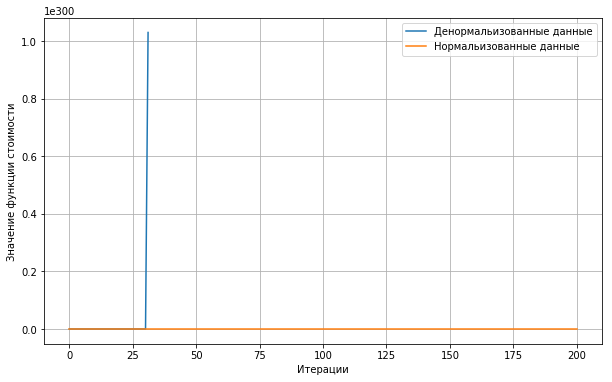

In [67]:
plt.figure(figsize=(10,6))

plt.plot(range(len(denorm_cost_history)), denorm_cost_history, label='Денормальизованные данные')
plt.plot(range(len(norm_cost_history)), norm_cost_history, label='Нормальизованные данные')

plt.grid(True)
plt.xlabel("Итерации")
plt.ylabel("Значение функции стоимости")
plt.legend()

**8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.**

In [81]:
def h(theta, x):
    return np.dot(x, theta.T)

def cost_f(theta, X, Y):
    m = len(Y)
    results = h(theta, X) - Y
    return (np.dot(results.T, results) / (2*m)).item()

def gd_vec(X, Y_un_resh, iterations = 200, alpha = 0.01):
    Y = Y_un_resh.reshape(-1, 1)
    
    features_count = X.shape[1]
    m = Y.size
    
    theta = np.zeros([1, features_count])    
    
    theta_history = np.zeros([iterations + 1, features_count])
    cost_history = np.zeros(iterations + 1)
    
    cost = cost_f(theta, X, Y)

    cost_history[0] = cost
    theta_history[0] = theta
    
    for it_idx in range(iterations):
        dt = np.dot((h(theta, X) - Y).T, X)
        theta = theta - (alpha / m) * dt
        
        cost = cost_f(theta, X, Y)
        
        cost_history[it_idx + 1] = cost
        theta_history[it_idx + 1] = theta
    
    return theta, cost, theta_history, cost_history

In [79]:
theta, cost, theta_history, cost_history = gd_old(X_norm, Y)

print(f'Cost: {cost}')
print(f'Theta: {theta}')

theta, cost, theta_history, cost_history = gd_vec(X_norm, Y)

print(f'Cost: {cost}')
print(f'Theta: {theta}')

Cost: 7571592939.046129
Theta: [294804.28212715  43355.1309382   18903.11447294]
Cost: 7571592939.046132
Theta: [[294804.28212715  43355.1309382   18903.11447294]]


**9. Покажите, что векторизация дает прирост производительности.**

In [70]:
%%time
theta, _, _, _ = gd_old(X_norm, Y, 9000, 0.1)
print(theta)

[340412.65957447 504777.87802321 -34952.04307876]
CPU times: user 5.75 s, sys: 48.8 ms, total: 5.8 s
Wall time: 5.8 s


In [71]:
%%time
theta, _, _, _ = gd_vec(X_norm, Y, 9000, 0.1)
print(theta)

[[340412.65957447 504777.87802321 -34952.04307876]]
CPU times: user 98.5 ms, sys: 2.2 ms, total: 101 ms
Wall time: 99.8 ms


**10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.**

In [72]:
loss = {}
iterations_count = 120

for alpha in [0.01, 0.05, 0.1, 0.5, 1, 2]:
    _, _, _, cost_history = gd_vec(X_norm, Y, iterations_count, alpha)
    loss[str(alpha)] = cost_history

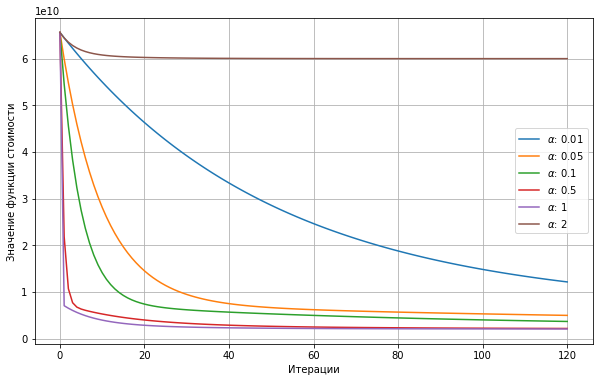

In [73]:
plt.figure(figsize=(10,6))

iter_range = range(iterations_count + 1)

for alpha, cost_series in loss.items():
    plt.plot(iter_range, cost_series, label=r'$ \alpha $: %s'%(alpha))

plt.grid(True)
plt.xlabel("Итерации")
plt.ylabel("Значение функции стоимости")
plt.legend()

**11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.**


In [74]:
def normal_equation(X, Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

In [75]:
%%time
normal_equation(X_norm, Y)

CPU times: user 1.45 ms, sys: 2.3 ms, total: 3.76 ms
Wall time: 4.98 ms


array([340412.65957447, 504777.90398791, -34952.07644931])

In [76]:
%%time
theta, _, _, _ = gd_vec(X_norm, Y, 9000, 0.1)

print(theta)

[[340412.65957447 504777.87802321 -34952.04307876]]
CPU times: user 93.5 ms, sys: 2.66 ms, total: 96.2 ms
Wall time: 95.9 ms
